In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [12]:
data = pd.read_csv('ohe_movies_confounders.csv', index_col='title_x')

In [6]:
data.head()

,revenue,Larry Mullen Jr.,50 Cent,A. J. Benza,A. J. Langer,A. Jay Radcliff,A. Michael Baldwin,A. Russell Andrews,A.D. Miles,A.J. Buckley,...,Édgar Vivar,Ólafur Darri Ólafsson,Óscar Casas,Óscar Jaenada,Ørjan Gamst,Đỗ Thị Hải Yến,Юлия Снигирь,徐帆,Z1,Z2
title_x,,,,,,,,,,,,,,,,,,,,,
Avatar,2787965087,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.249008,0.132624
Pirates of the Caribbean: At World's End,961000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.192756,-0.268983
Spectre,880674609,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.580435,0.048904
The Dark Knight Rises,1084939099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.346079,0.113061
John Carter,284139100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.167009,-1.014746


(array([2.998e+03, 2.550e+02, 7.500e+01, 3.400e+01, 6.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.04199845,  0.05800155,  0.15800155,  0.25800155,  0.35800155,
         0.45800155,  0.55800155,  0.65800155,  0.75800155,  0.85800155,
         0.95800155]),
 <a list of 10 Patch objects>)

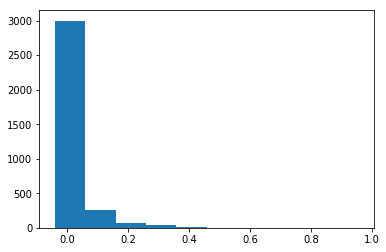

In [14]:
plt.hist(((data['revenue'] - data['revenue'].mean()) / (data['revenue'].max() - data['revenue'].min())))

(array([  15.,    6.,    2.,    9.,   40.,  117.,  303., 1159., 1489.,
         234.]),
 array([ 1.60943791,  3.6233519 ,  5.63726589,  7.65117988,  9.66509387,
        11.67900786, 13.69292185, 15.70683584, 17.72074983, 19.73466382,
        21.74857781]),
 <a list of 10 Patch objects>)

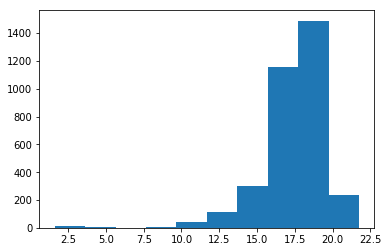

In [20]:
plt.hist(np.log(data['revenue'].values))

In [32]:
Y = data.iloc[:, :1]
X = data.iloc[:, 1:]
X_NoCF = X.iloc[:, :-2]

In [41]:
Y_Scaled = preprocessing.StandardScaler().fit_transform(Y)
Y_Log = np.log(Y)

/Users/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [52]:
def fitModel(X, Y, test_size=0.8, model=LinearRegression()):
#     model = LinearRegression()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    score = r2_score(Y_test, Y_pred)
    plt.plot(Y_pred, Y_test, 'o')
    plt.title('Score : ' + str(score))
    plt.show()
    return model.coef_

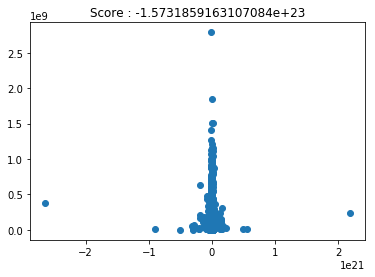

In [53]:
coef_NoCF_Y = fitModel(X_NoCF, Y)

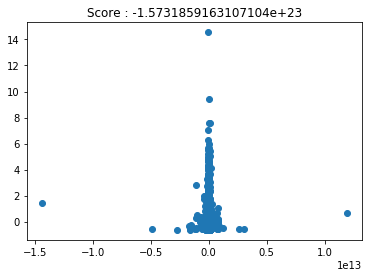

array([[-2.35487987e+19, -1.82744627e+19,  2.96352948e+18, ...,
         0.00000000e+00,  1.19954239e+18,  0.00000000e+00]])

In [62]:
coef_NoCF_Y_Scaled = fitModel(X_NoCF, Y_Scaled)
coef_NoCF_Y

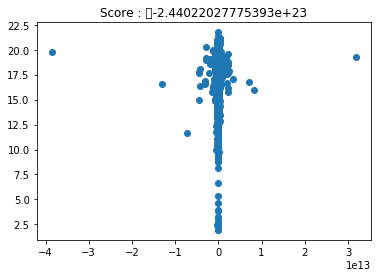

In [47]:
coef_NoCF_Y_Log = fitModel(X_NoCF, Y_Log)

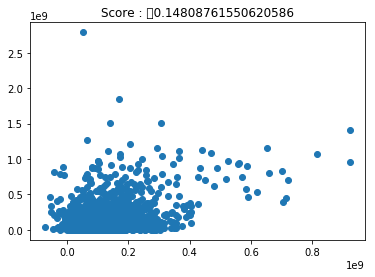

In [49]:
coef_Y = fitModel(X, Y)

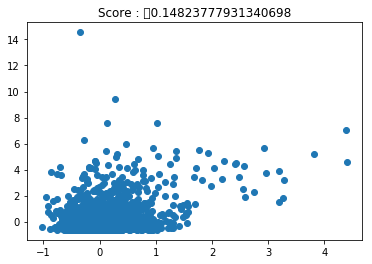

In [50]:
coef_Y_Scaled = fitModel(X, Y_Scaled)

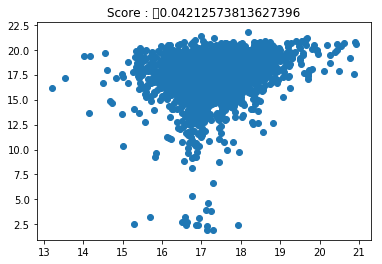

In [51]:
coef_Y_Log = fitModel(X, Y_Log)

In [63]:
from  sklearn.ensemble import RandomForestRegressor

/Users/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarthak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


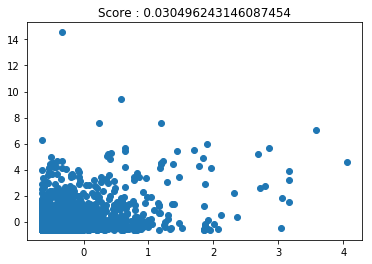

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [64]:
coef_NoCF_Y_Scaled = fitModel(X_NoCF, Y_Scaled, model=RandomForestRegressor())

/Users/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarthak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


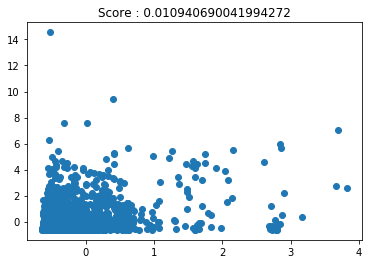

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [65]:
coef_Y_Scaled = fitModel(X, Y_Scaled, model=RandomForestRegressor())